In [1]:
!pip install scikit-learn
!pip install statsmodels
!pip install scipy

     |████████████████████████████████| 7.3 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 5.4 MB/s eta 0:00:01


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical 
#columns in a dataframe called categoricals.

In [4]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
numerical = data.select_dtypes(include = np.number)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
categorical = data.select_dtypes(include = np.object)
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


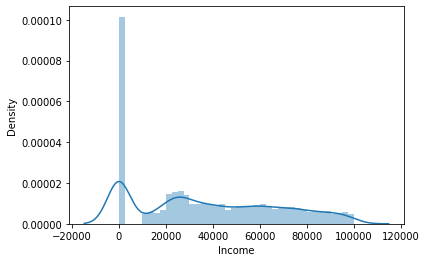

In [22]:
#Now we will try to check the normality of the numerical variables visually
#seaborn
# i would be say that this grafic look don't like a normal distribution
sns.distplot(numerical['Income'], bins = 40)
plt.show()

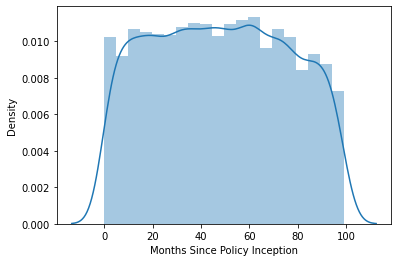

In [14]:
sns.distplot(numerical['Months Since Policy Inception'], bins = 20)
plt.show()
#this grafic, i would be say isn't see like a normal distirbution

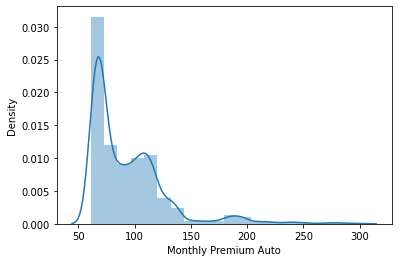

In [15]:
sns.distplot(numerical['Monthly Premium Auto'], bins = 20)
plt.show()
#don't like a normal distribution grafic

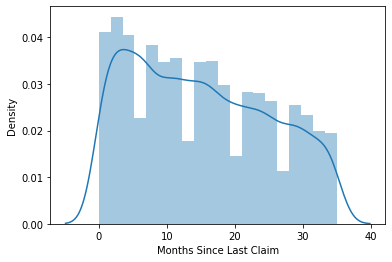

In [16]:
sns.distplot(numerical['Months Since Last Claim'], bins = 20)
plt.show()
#don't like a normal distribution grafic

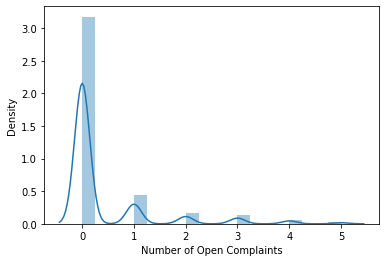

In [18]:
sns.distplot(numerical['Number of Open Complaints'], bins = 20)
plt.show()
#maybe the first parable but i don't sure

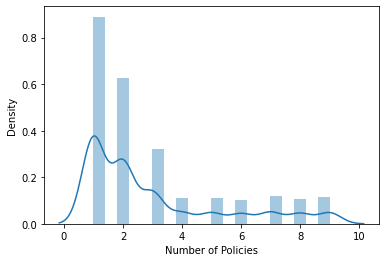

In [19]:
sns.distplot(numerical['Number of Policies'], bins = 20)
plt.show()
#is not a normal distribution grafic

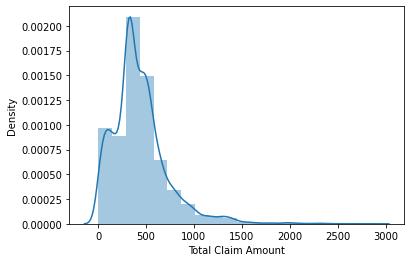

In [20]:
sns.distplot(numerical['Total Claim Amount'], bins = 20)
plt.show()
#is a normal distribution grafic

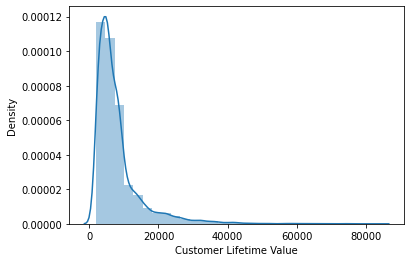

In [30]:
sns.distplot(numerical['Customer Lifetime Value'], bins = 30)
plt.show()
#ist a normal distirbution grafic

<Figure size 2880x2880 with 0 Axes>

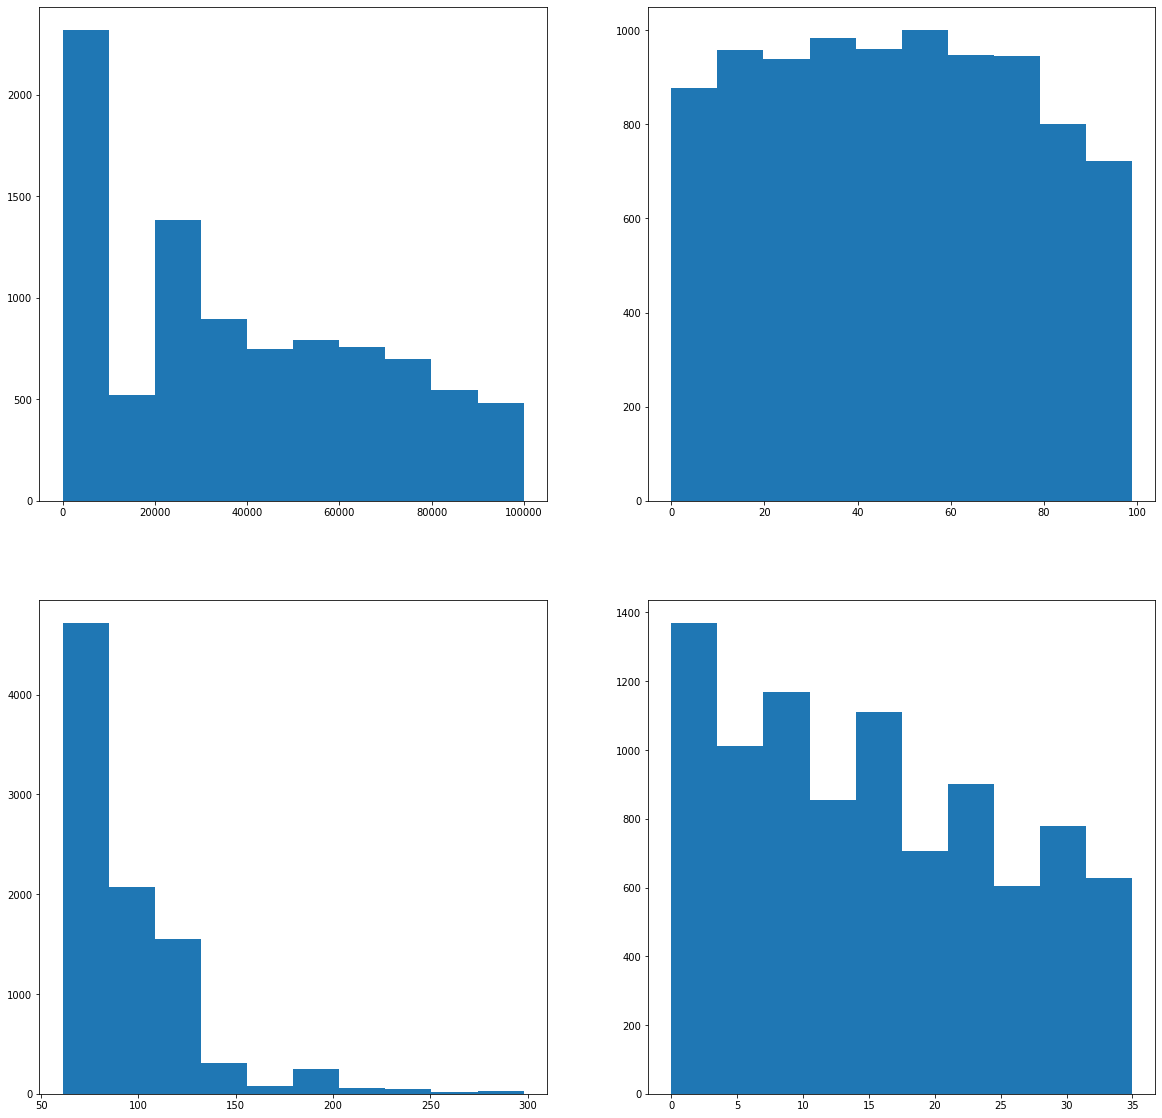

In [24]:
#Matplotlib
plt.figure(figsize = (40,40))
fig, axs = plt.subplots(2, 2, figsize = (20,20))
axs[0, 0].hist(numerical['Income'])
axs[0, 1].hist(numerical['Months Since Policy Inception'])
axs[1, 0].hist(numerical['Monthly Premium Auto'])
axs[1, 1].hist(numerical['Months Since Last Claim'])
plt.show()

<Figure size 2880x2880 with 0 Axes>

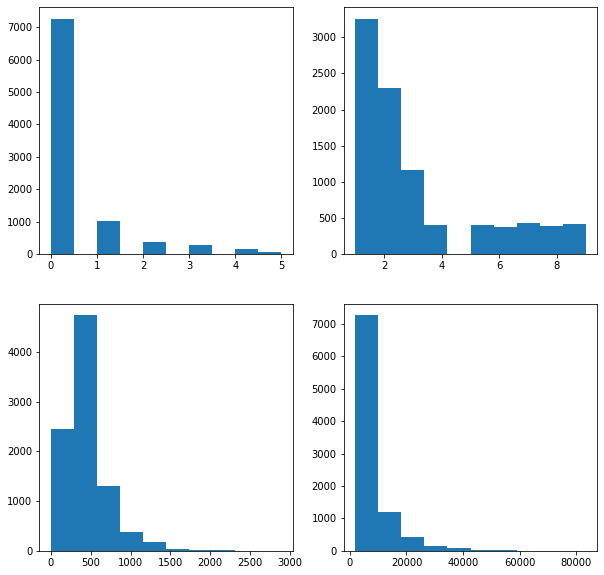

In [27]:
plt.figure(figsize = (40,40))
fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0, 0].hist(numerical['Number of Open Complaints'])
axs[0, 1].hist(numerical['Number of Policies'])
axs[1, 0].hist(numerical['Total Claim Amount'])
axs[1, 1].hist(numerical['Customer Lifetime Value'])
plt.show()

In [29]:
#For the numerical variables, check the multicollinearity between the features. Please note that 
#we will use the column total_claim_amount later as the target variable.
x = numerical.drop(['Total Claim Amount'], axis = 1)
y = numerical['Total Claim Amount']

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:38:58   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

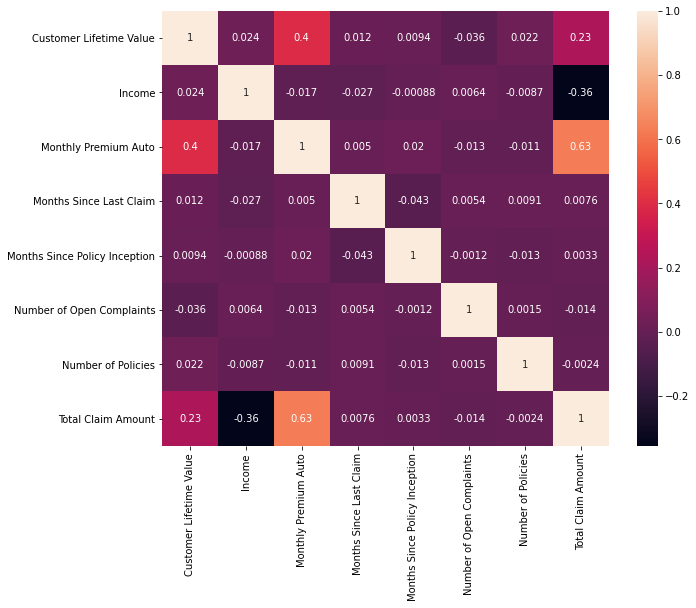

In [31]:
#4.
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(numerical.corr(method='pearson'), annot=True)
plt.show()
# there is no pair of features that have a high correlation (0.9) but im not sure...